<a href="https://colab.research.google.com/github/mehraanjali/bio_stats/blob/main/Statistical_Analysis_of_bodyPerformance_and_using_Linear_Regression_to_find_relations_between_different_aspects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [ ]:
# Mean of individual column of dataframe
df['body fat_%'].mean()

23.240164950869858

In [ ]:
# Mean of all the columns in dataframe
df.mean()

<ipython-input-9-c61f79bc72e6>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [ ]:
from scipy.stats import gmean
gmean(df['body fat_%'])

22.053450257160534

In [ ]:
import statistics
import scipy.stats

statistics.harmonic_mean(df['body fat_%'])

20.766092233445065

In [ ]:
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [ ]:
statistics.median(df['body fat_%'])

22.8

In [ ]:
statistics.variance(df['body fat_%'])

52.66178600041373

In [ ]:
statistics.variance(df['height_cm'])

71.00729348140636

In [ ]:
statistics.stdev(df['body fat_%'])

7.256844079929906

In [ ]:
df.skew()

<ipython-input-17-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

In [ ]:
df.head

<bound method NDFrame.head of         age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  si

In [ ]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
  # Multiple Linear Regression
x = df[['height_cm', 'weight_kg','body fat_%']]
y = df[['sit-ups counts']]


In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
#Implenting Linear Model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(x_test).round()

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         sit-ups counts   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          6.392e+04
Date:                Tue, 08 Aug 2023   Prob (F-statistic):                        0.00
Time:                        06:06:34   Log-Likelihood:                         -50868.
No. Observations:               13393   AIC:                                  1.017e+05
Df Residuals:                   13390   BIC:                                  1.018e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height_cm      0.3098      0.004     73.336      0.000       0.302       0.318
weight_kg      0.1530      0.010     15.971      0.000       0.134       0.172
body fat_%    -0.9808      0.012    -83.196      0.000      -1.004      -0.958
==============================================================================
Omnibus:                       39.882   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.539
Skew:                          -0.105   Prob(JB):                     5.79e-10
Kurtosis:                       3.180   Cond. No.                         23.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1200x800 with 0 Axes>

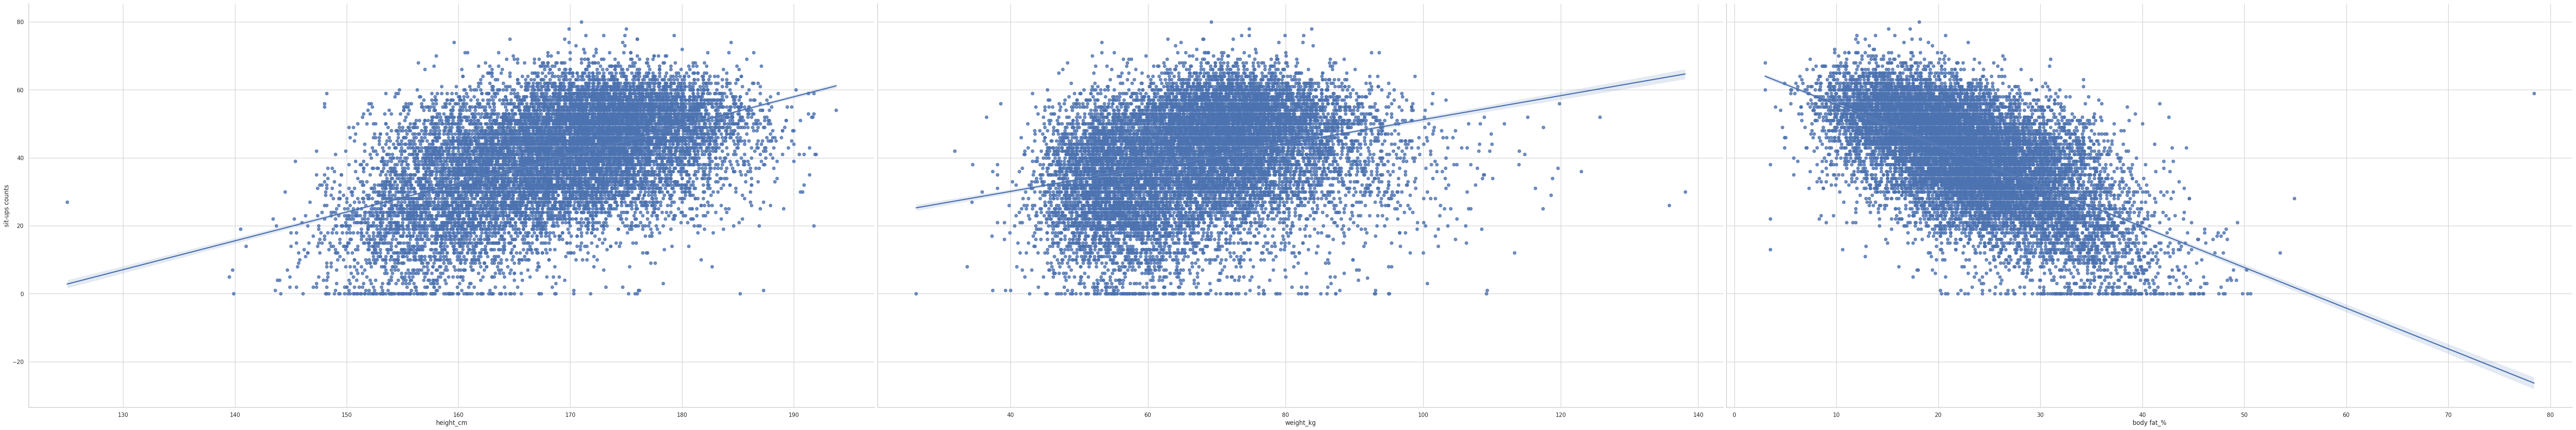

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Create a pair plot for selected variables
sns.pairplot(
    df,
    x_vars=["height_cm", "weight_kg", "body fat_%"],
    y_vars=["sit-ups counts"],
    kind="reg",  # Use regression line for scatter plots
    height=12,     # Height of each subplot
    aspect=2,     # Height of each subplot
)

plt.show()


In [ ]:
x = df[['height_cm', 'weight_kg','body fat_%']]
y = df[['broad jump_cm']]

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(x_test).round()

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          broad jump_cm   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          2.853e+05
Date:                Tue, 08 Aug 2023   Prob (F-statistic):                        0.00
Time:                        07:09:33   Log-Likelihood:                         -61629.
No. Observations:               13393   AIC:                                  1.233e+05
Df Residuals:                   13390   BIC:                                  1.233e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height_cm      1.1678      0.009    123.771      0.000       1.149       1.186
weight_kg      0.8809      0.021     41.175      0.000       0.839       0.923
body fat_%    -2.8485      0.026   -108.186      0.000      -2.900      -2.797
==============================================================================
Omnibus:                     1802.079   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6430.891
Skew:                          -0.661   Prob(JB):                         0.00
Kurtosis:                       6.127   Cond. No.                         23.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1200x800 with 0 Axes>

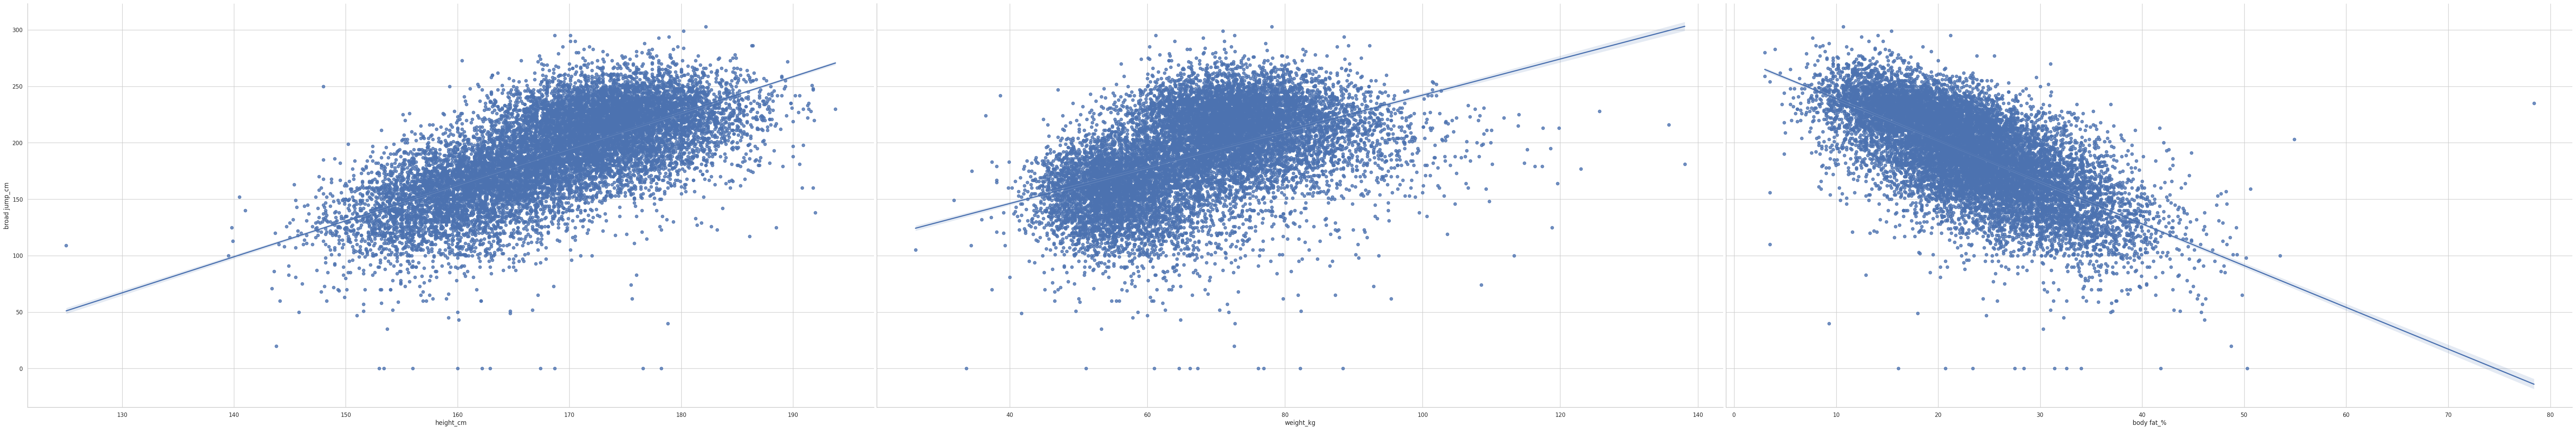

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Create a pair plot for selected variables
sns.pairplot(
    df,
    x_vars=["height_cm", "weight_kg", "body fat_%"],
    y_vars=["broad jump_cm"],
    kind="reg",  # Use regression line for scatter plots
    height=12,     # Height of each subplot
    aspect=2,     # Height of each subplot
)

plt.show()


In [ ]:
df.skew()

<ipython-input-58-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

<Axes: ylabel='Density'>

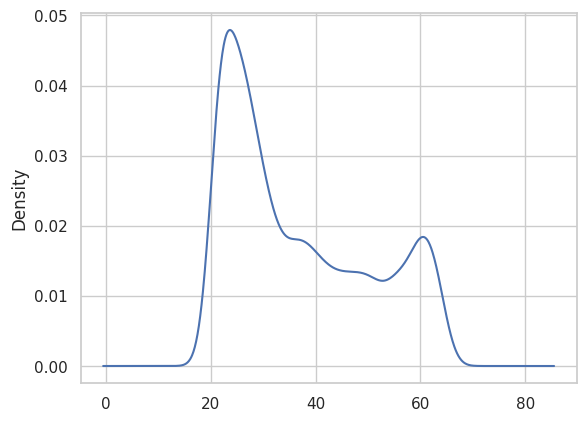

In [ ]:
df['age'].plot(kind = 'density')

<Axes: ylabel='Density'>

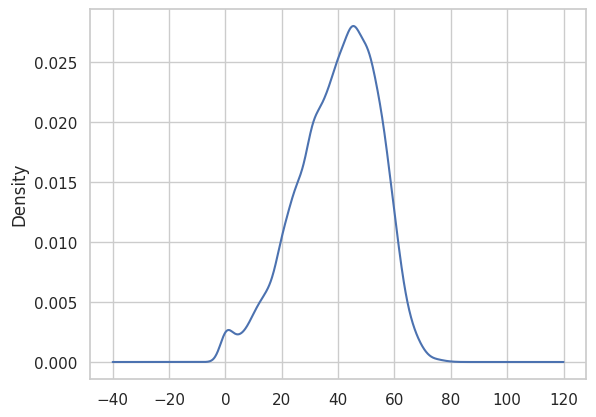

In [ ]:
df['sit-ups counts'].plot(kind = 'density')

<ipython-input-60-79e69b9388e7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight_kg'],hist=True,kde=True)


<Axes: xlabel='weight_kg', ylabel='Density'>

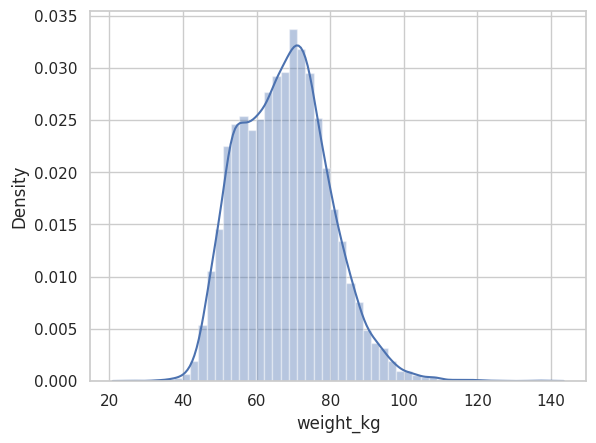

In [ ]:
#Normal Distribution/Symmetric
sns.distplot(df['weight_kg'],hist=True,kde=True)

<Axes: ylabel='Density'>

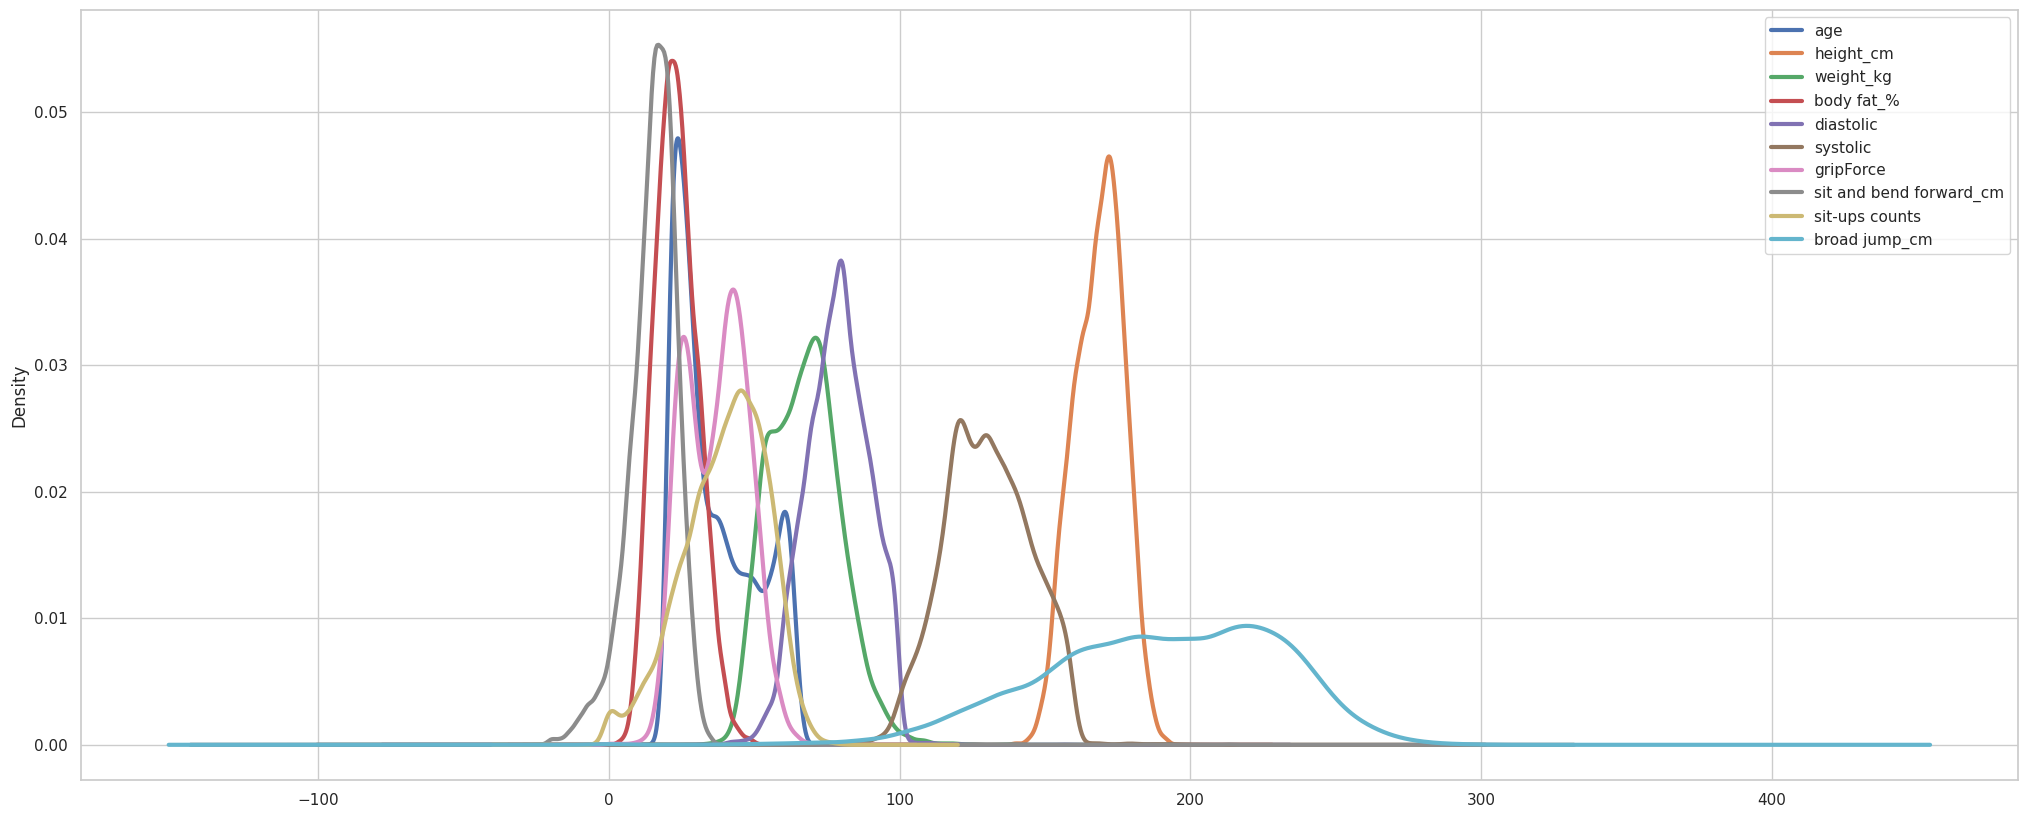

In [ ]:
#Density of all features
df.plot.density(figsize = (25, 10),linewidth = 3)

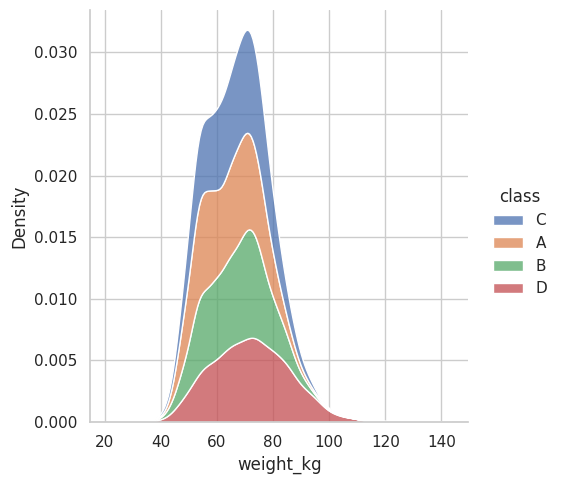

In [ ]:
sns.displot(df, x="weight_kg", hue="class", kind="kde", multiple="stack")

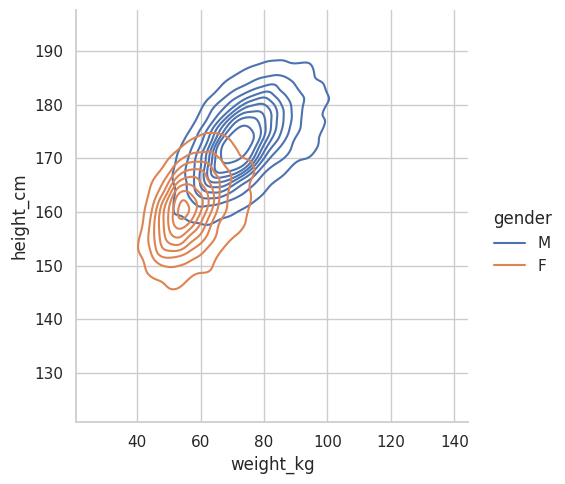

In [ ]:
sns.displot(df, x="weight_kg", y="height_cm", hue="gender", kind="kde")

<Axes: >

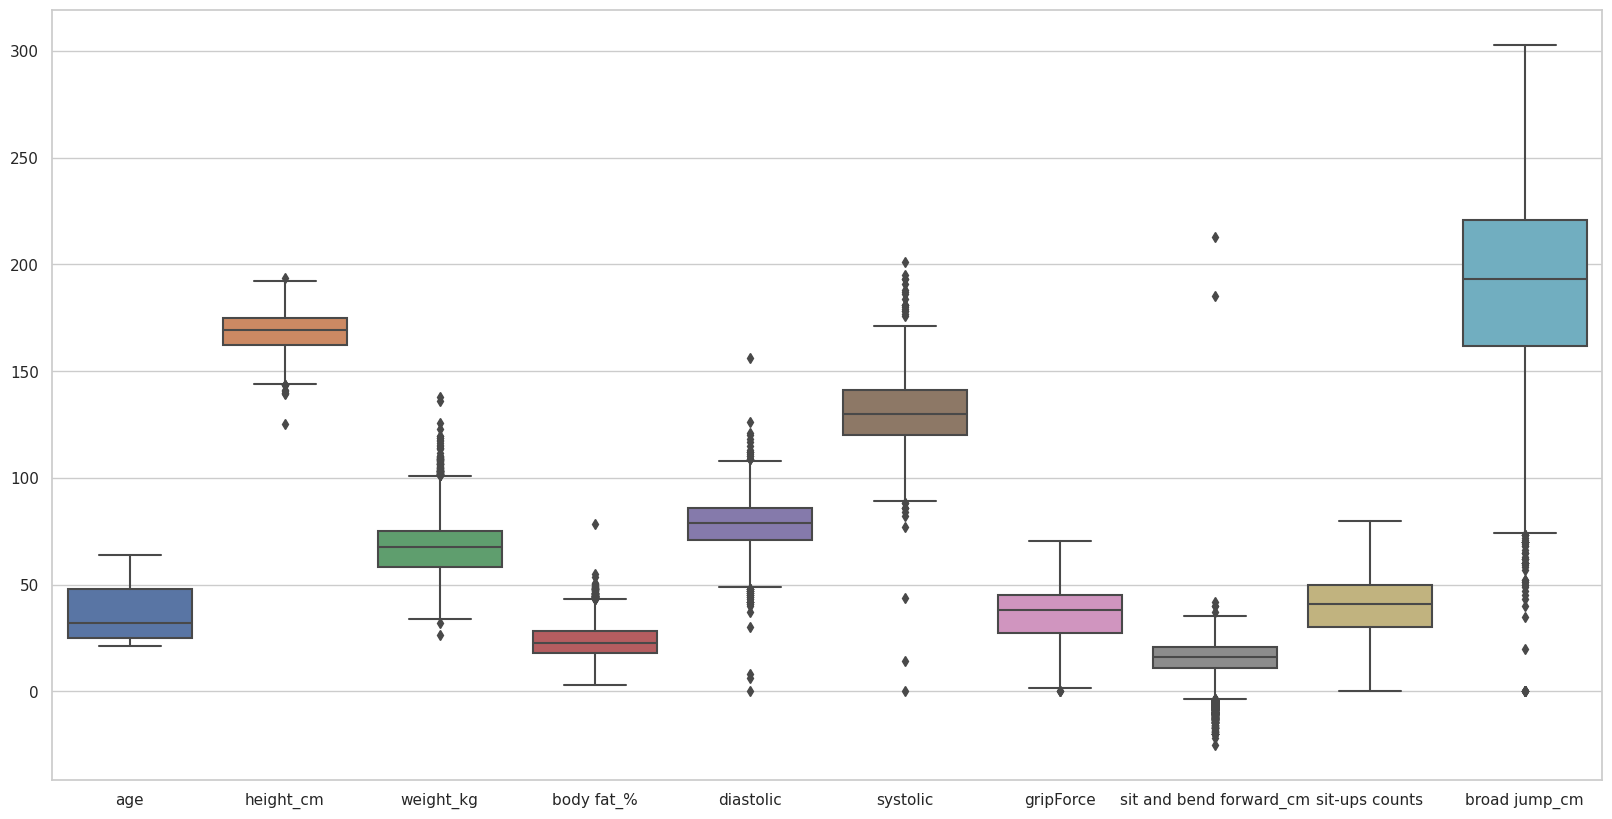

In [ ]:
#Boxlot can plot outliers in data
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)

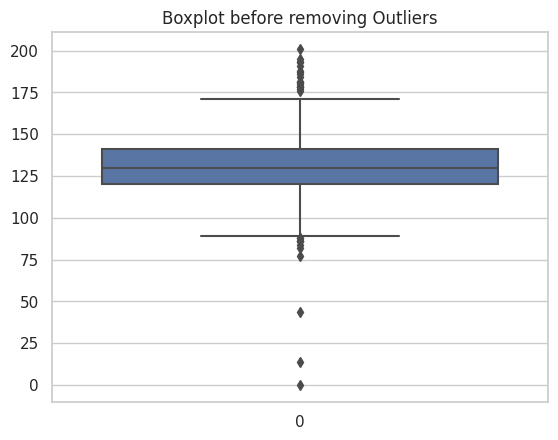

In [ ]:
#Take an example by removing outliers in 'systolic' column:
sns.boxplot(df['systolic'])
plt.title('Boxplot before removing Outliers')
plt.show()

<Axes: xlabel='class', ylabel='count'>

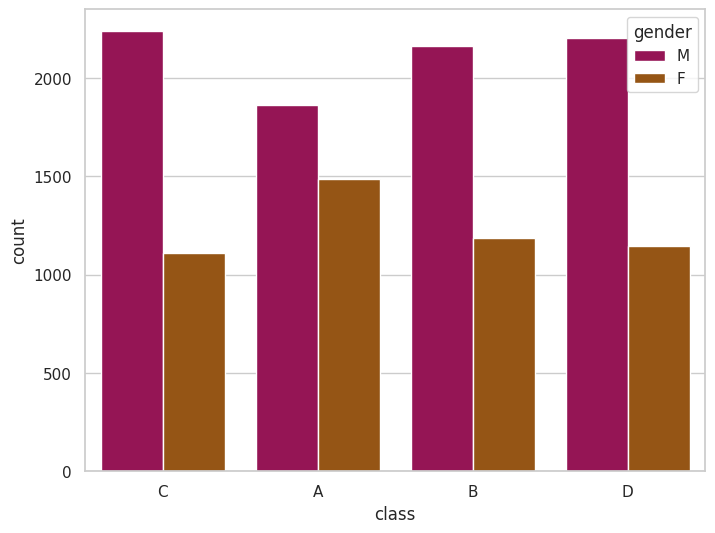

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set_style('whitegrid')
sns.countplot(x='class',hue='gender',data=df,palette='brg')

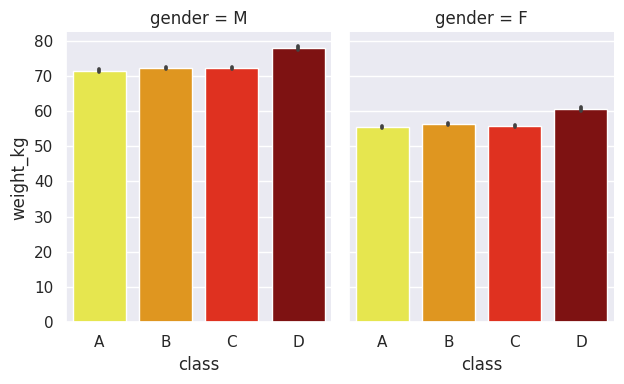

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
g = sns.FacetGrid(df, col="gender", height=4, aspect=0.8 )
g.map(sns.barplot, "class", "weight_kg",order=['A','B','C','D'],palette='hot_r' )

<Axes: xlabel='class', ylabel='body fat_%'>

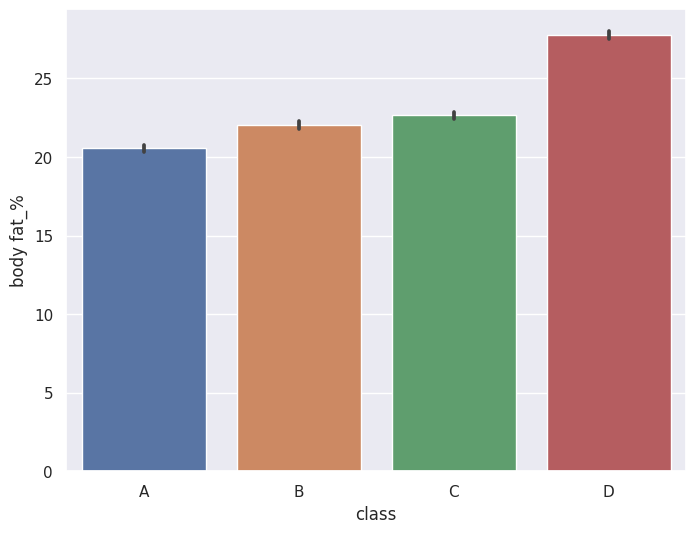

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(data = df, x='class',y='body fat_%',order=['A','B','C','D'])

<ipython-input-69-ad5234e7c454>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts',labels=labels, colors=['#003f5c', '#bc5090', '#ffa600','#f00000'])


<Figure size 1500x600 with 0 Axes>

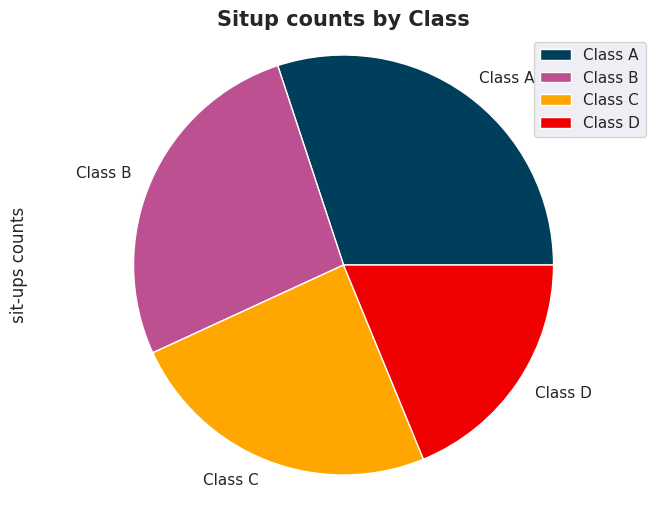

In [ ]:


plt.figure(figsize=(15, 6))
labels=['Class A', 'Class B', 'Class C','Class D']
df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts',labels=labels, colors=['#003f5c', '#bc5090', '#ffa600','#f00000'])
plt.axis('equal')
plt.title('Situp counts by Class', fontsize=15, fontweight='bold');



<ipython-input-70-e96e35775995>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%',labels=labels, colors=['#bc5090', '#ffa600'],explode=(0.0, 0.1))


<Figure size 1500x600 with 0 Axes>

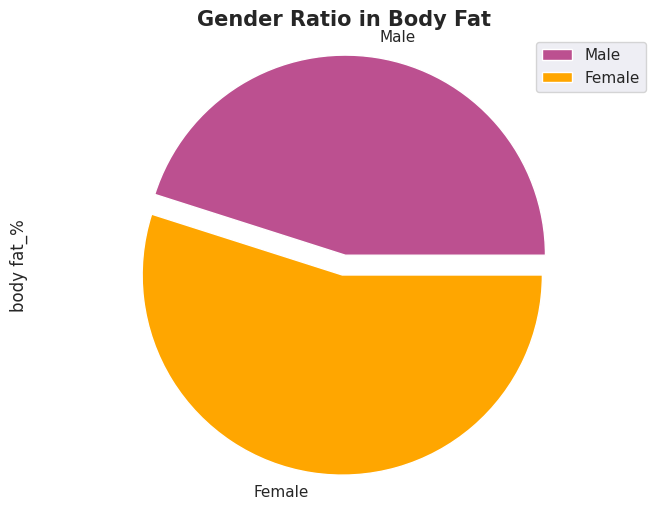

In [ ]:
plt.figure(figsize=(15, 6))
labels=['Male','Female']
df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%',labels=labels, colors=['#bc5090', '#ffa600'],explode=(0.0, 0.1))
plt.axis('equal')
plt.title('Gender Ratio in Body Fat', fontsize=15, fontweight='bold');